ARIMA & SARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
data=pd.read_csv("C:/Recent Download/Sales.csv")
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.rename({'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},axis=1,inplace=True)

In [5]:
data.shape

(107, 2)

In [6]:
data.drop(106,axis=0,inplace=True)

In [7]:
data.drop(105,axis=0,inplace=True)

In [8]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
data['Month']=pd.to_datetime(data['Month'])

In [10]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
data.set_index(['Month'],inplace=True)

In [12]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

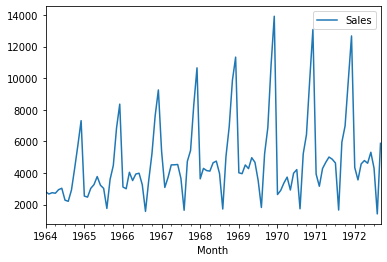

In [14]:
data.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(data['Sales'])

In [17]:
#Test Stationary
def adfuller_test(Sales):
    result=adfuller(Sales)
    labels=['ADF Test Statistic','p-value','lag used','Number of Observations used']
    for value,label in zip(result,labels):
        print(label+ ':'+str(value))
    if result[1]<=0.05:
        print('Reject null Hypo.Data has no unit root and is Stationary')
    else:
        print('Reject alternative hypo.Data has unit roots and is not Stationary.' )
    


In [18]:
adfuller_test(data['Sales'])

ADF Test Statistic:-1.8335930563276195
p-value:0.3639157716602467
lag used:11
Number of Observations used:93
Reject alternative hypo.Data has unit roots and is not Stationary.


In [19]:
#Differencing
data['Sales First Difference']=data['Sales'] - data['Sales'].shift(1)

In [20]:
data['Seasonal Difference']=data['Sales']-data['Sales'].shift(12)


In [21]:
data.head(13)

,Sales,Sales First Difference,Seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [22]:
adfuller_test(data['Seasonal Difference'].dropna())

ADF Test Statistic:-7.626619157213166
p-value:2.0605796968136632e-11
lag used:0
Number of Observations used:92
Reject null Hypo.Data has no unit root and is Stationary


<AxesSubplot:xlabel='Month'>

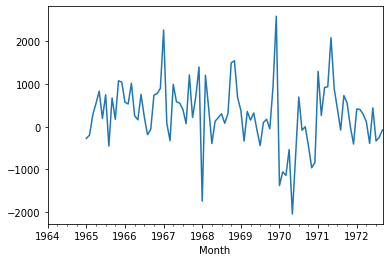

In [23]:
data['Seasonal Difference'].plot()

data['Sales First Difference'].plot()

In [24]:
#Auto Regressor
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

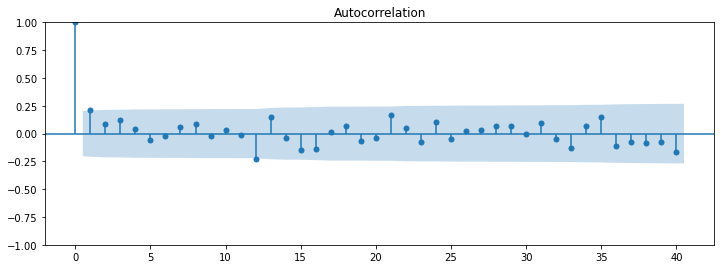

In [25]:
fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(211)
fig= sm.graphics.tsaplots.plot_acf(data['Seasonal Difference'].iloc[13:],lags=40,ax=ax1)

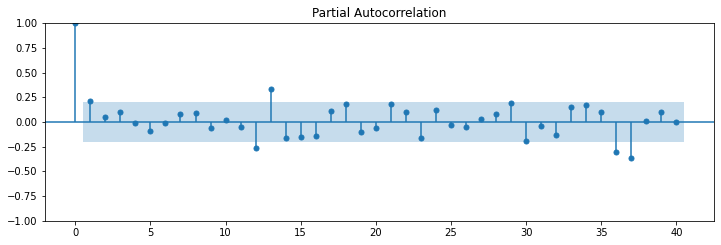

In [26]:
fig=plt.figure(figsize=(12,8))
ax2=fig.add_subplot(212)
fig= sm.graphics.tsaplots.plot_pacf(data['Seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [27]:
import statsmodels.api as sm

In [28]:
from statsmodels.tsa.statespace import sarimax 

In [29]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

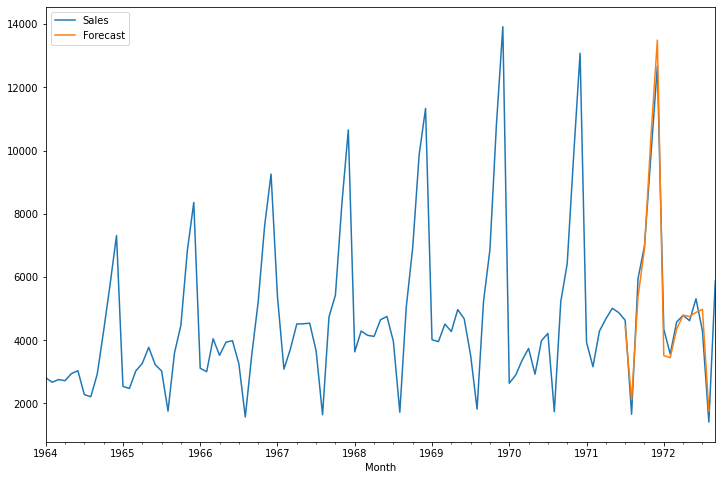

In [31]:
data['Forecast']=results.predict(start=90,end=103)
data[['Sales','Forecast']].plot(figsize=(12,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [33]:
future_dates_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_dates_data.tail()

,Sales,Sales First Difference,Seasonal Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [34]:
future_data=pd.concat([data,future_dates_data])

<AxesSubplot:>

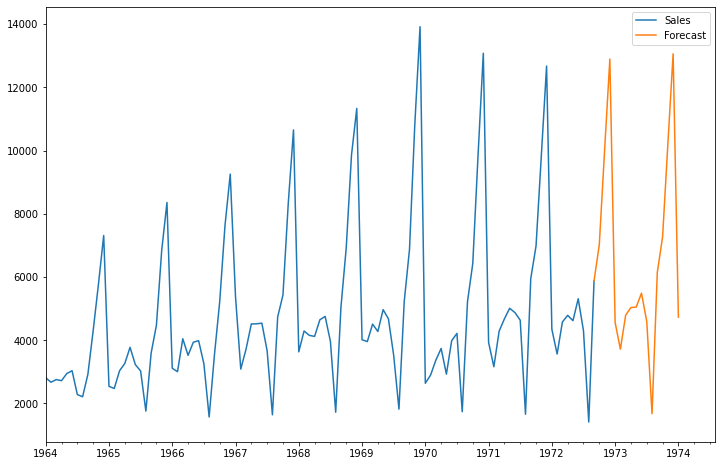

In [37]:
future_data['Forecast']=results.predict(start=104,end=120)
future_data[['Sales','Forecast']].plot(figsize=(12,8))